# Chapter 5: Camera and Image

Goal of study:
- learn the models of pinhole camera, instrinsic, extrinsic and distortion
- learn how to project a spatial point to an image 2-D plane
- learn the basic image processing techniques in OpenCV

This part aims to introduce "how the robotics observe the world". The camera is the most important sensor in robotics. The camera can observe the world and provide the information to the robot. The camera can be used to detect the object, to measure the distance, to track the motion, to recognize the scene, to localize the robot, to map the environment, etc. 

The camera is a device that can capture the light and convert it to the electrical signal. The camera can be used to capture the image of the world. The image is a 2-D array of pixels. Each pixel is a small square that can be used to represent the color of the light. The color of the light can be represented by the RGB (Red, Green, Blue) color space. The RGB color space is a 3-D space that can be used to represent the color of the light. The RGB color space is a very popular color space in computer vision.

**How does a camera work?**

When a camera captures an image, it records the light information from a scene and converts it into a digital representation that can be processed and displayed by computers or other electronic devices. Here's a step-by-step explanation of how an image is generated by a digital camera:

- `Light enters the camera`: When you point a camera at a scene, the light reflected from the objects in the scene enters the camera through the lens, which is designed to focus and control the light.
- `Focused light`: The lens focuses the incoming light onto the camera's image sensor, a light-sensitive semiconductor device typically made of charge-coupled device (CCD) or complementary metal-oxide-semiconductor (CMOS) technology.
- `Image sensor`: The image sensor consists of millions of tiny light-sensitive elements called pixels (short for "picture elements"). Each pixel detects the intensity of the light that falls on it, and in the case of color cameras, a color filter array (such as the Bayer filter) is used to record color information. The filter array has a pattern of red, green, and blue filters, which allows each pixel to detect a specific color.
- `Analog-to-digital conversion`: The light intensity and color information detected by the pixels are initially in the form of analog signals. These analog signals are then converted into digital signals by an analog-to-digital converter (ADC). Each pixel's intensity value is represented as a number, usually in an 8-bit, 10-bit, or higher format. This means that, for example, an 8-bit image can represent 256 different intensity levels for each color channel.
- `Demosaicing`: Since each pixel only detects one color (red, green, or blue) due to the color filter array, a process called demosaicing is used to reconstruct the full-color image. Demosaicing algorithms estimate the missing color information for each pixel by considering the values of neighboring pixels. This results in an image where each pixel has intensity values for red, green, and blue channels.
- `Image processing`: The camera's image processor takes the raw data from the sensor and applies various adjustments and corrections, such as white balance, color correction, contrast enhancement, and noise reduction. This processing helps create a more visually pleasing and accurate representation of the scene.
- `Image compression and storage`: The processed image is typically compressed using a format like JPEG to reduce file size and make it easier to store and share. The compressed image is then saved to the camera's internal memory or a removable storage device like an SD card.

The final digital image generated by the camera is a matrix of pixels, where each pixel has intensity values for red, green, and blue color channels. This image can be displayed on a screen, further processed by computer vision algorithms, or printed on paper.

## 5.1 Camera Mathematical Model

### 5.1.1 Pinhole Camera Model

The camera model is to describe the transformation of an object in the 3-D workd to its 2-D image.
Say a 3-D point $P_w(x_w, y_w, z_w)$ in the world coordinate system is projected to a 2-D point $p(u,v)$ in the image plane by a camera of pose $T$. 
How to get $p(u,v)$ in the 2-D image?


- image plane: the 2-D plane that the image is projected to

Say the 3-D point in the camera coordinate system is $P_c(x_c, y_c, z_c)$. 

$$
P_c = T \cdot P_w
$$

The image of $P_c$ in the image plane is $p(u,v)$.

$$
\begin{align}
p(u,v,1) &= \frac{1}{z_c} \cdot K \cdot T \cdot P_w\\
&= \frac{1}{z_c}\begin{bmatrix} 
        f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 
    \end{bmatrix} 
    \cdot 
    \begin{bmatrix} 
        R_{3 \times 3} & t_{3 \times 1} \\ 0 & 1 
    \end{bmatrix} 
    \cdot 
    \begin{bmatrix} 
        x_w \\ y_w \\ z_w  
    \end{bmatrix} \\
&= \frac{1}{z_c} \cdot K \cdot P_c \\
& = K \cdot 
    \begin{bmatrix}
        \frac{x_c}{z_c} \\
        \frac{y_c}{z_c} \\
        1
    \end{bmatrix}
\end{align}
$$



The camera pose $R$ and $t$ are known as camera extrinsics, which are the parameters that describe the position and orientation of the camera relative to the world coordinate system. 
Since usually the camera moves with the mobile robotics, the camera extrinsics are usually unknown, and need to be estimated from the image data, which is a major part of the SLAM.

The projection process can also be viewed as: we can convert a world coordinate point to the camera coordinate system first and then remove the last dimension. The depth of the point from the imaging plane of the camera is then removed, which is equivalent to the normalization on the last dimension. In this way, we get the projection of the point $P$ on the camera \textit{normalized plane}:

### 5.1.2 Distortion Model
We typically add lens in front of the camera to focus and control the light. The lens can introduce distortion to the image. The distortion can be divided into two categories: radial distortion and tangential distortion.

The distortion model is to correct the pixel coordinates in the camera normalized plane $P_{cn}(x,y,1) = P_{cn}(\frac{x_c}{z_c}, \frac{y_c}{z_c}, 1)$.

For radial distortion, we can use an empirical model to describe the distortion. 
We define the radius of $r$ as $\sqrt {x^2 + y^2}$

$$
\begin{align}
    x_d &= x(1+k_1r^2+k_2r^4+k_3r^6)\\
    y_d &= y(1+k_1r^2+k_2r^4+k_3r^6)\\
\end{align}
$$

For tangential distortion, we can add two more parameters $p_1$ and $p_2$ to describe:

$$
\begin{align}
    x_d &= x + 2p_1xy+p_2(r^2+2x^2)\\
    y_d &= y + p_1(r^2+2y^2)+2p_2xy\\
\end{align}
$$

Therefore, by introducing additional 5 parameters, we can find the correct pixel coordinates in the image plane.

1. project the 3-D point to the camera normalized plane, and its coordinates is $[x,y]$
2. apply the distortion model to the coordinates, and get the distorted coordinates $[x_d, y_d]$ by:
$$
\begin{align}
    x_d &= x(1+k_1r^2+k_2r^4+k_3r^6) + 2p_1xy+p_2(r^2+2x^2)\\
    y_d &= y(1+k_1r^2+k_2r^4+k_3r^6) + p_1(r^2+2y^2)+2p_2xy\\
\end{align}
$$
3. convert the distorted coordinates to the pixel coordinates in the image plane, and get the pixel coordinates $[u,v]$ by:
$$
\begin{align}
    u &= f_x x_d + c_x\\
    v &= f_y y_d + c_y\\
\end{align}
$$


**NOTE**

Typical workflow is to undistort the image first and then discuss the coordinate in the image plane. 
This does not need add distortion model to the camera mdoel.

**Undistortion an Image**

Given the camera with distoration parameters $k_1, k_2, k_3, p_1, p_2$, and a distorted image $I_d$ with pixels at $[v_d, u_d]$, we want to get the undistorted image $I$.

- Mathematically, we need move the pixel value at the pixel coordinates $[v_d, u_d]$ to the pixel coordinates $[v, u]$.
-  Notes:
    - the original point at image plane is $[x,y]$
    - without distortion, the point at pixel coordinates is $[v,u]$
    - with distortion, the point is $[x_d, y_d]$, and the point at pixel coordinates is $[v_d,u_d]$
- Procedures:
    - initialize an undistorted image $I$ with the same size as $I_d$
    - traverse its pixels coordinates $[v,u]$ to get the corresponding $[x,y]$
    - apply the distortion model to get the distorted coordinates $[x_d, y_d]$
    - convert the distorted coordinates to the pixel coordinates in the image plane, and get the pixel coordinates $[v_d,u_d]$
    - move the pixel value at $[v_d, u_d]$ to $[v, u]$ in the undistorted image $I$ -> interpolation (nearest neighbor, bilinear, bicubic, etc.)
    


### 5.1.3 Stereo Camera Model

Pinhole camera cannot capture the depth information of the scene.
Stereo camera is a pair of cameras that are mounted on a rigid frame and are oriented in the same direction, consisting of a left camera and a right camera.

The `disparity` or `parallax` is the difference in the horizontal position of the same point in the two images.
The calculation of depth information relies on the assumption that the scene is planar, and the depth of the point is proportional to the disparity.
In reality, the `disparity` is not easy to calculate.

### 5.1.4 RGB-D Camera Model
RGB-D camera is a camera that can capture both color and depth information of the scene.
The depth information is captured by a depth sensor, which is usually a time-of-flight sensor or structured light sensor.
No matter which sensor is used, the camera would eject a beam usually ultra beam and measure the time it takes for the beam to reflect back to the sensor.


## 5.2 Images

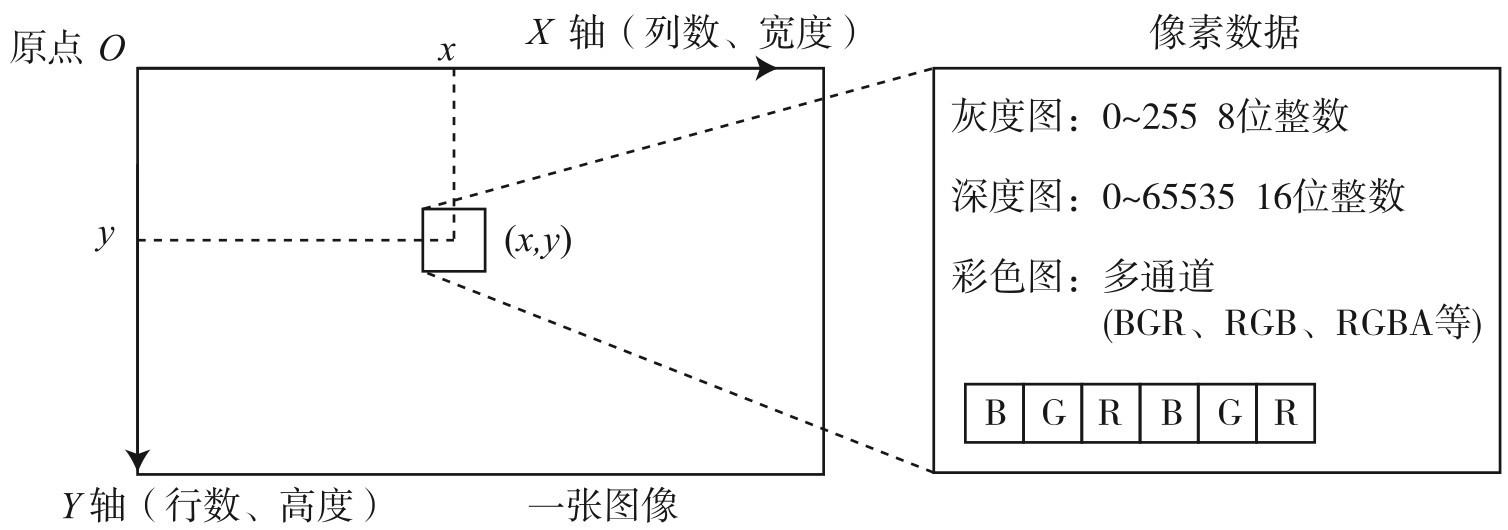

## 5.3 OpenCV